Este colab fue desarrollado por Arnold Charry Armero.

# Regresión Polinómica



La regresión polinómica obtiene un polinomio de grado $n$ elegido por el usuario que más se ajuste a una distribución de datos. Este método funciona para describir fenómenos de bases de datos que no se adaptan a la regresión lineal, pero que sí funcionan para una regresión no lineal. Matemáticamente, se expresa de la siguiente manera:

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x^2_1 +  ... + \beta_nx^n_1  $$

Ahora se sigue con la implementación del código,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/Ice_cream selling data.csv')

In [ ]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


## Preprocesamiento de Datos

In [ ]:
# Obtenemos los vectores
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Se prueba teniendo datos de grado 2
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

## Separación en Base de datos de Entrenamiento y Prueba

Se divide la base de datos en entrenamiento y prueba,

In [ ]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 0)

Se obtienen 2 valores cuando se emplea regresión polinómica: el valor $x$ y el valor $x^{2}$.

In [ ]:
X_train.shape

(39, 2)

## Entrenamiento del Modelo

Se entrena el modelo,

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Obteniendo los coeficientes del modelo,

In [ ]:
print('Coeficientes: ', model.coef_)
print('Intercepción: ', model.intercept_)

Coeficientes:  [-0.74433207  1.77431524]
Intercepción:  3.6489454359664286


Quedando como la siguiente función,

$$\hat{y} = 3.65 - 0.744x + 1.7743x^2  $$

In [ ]:
# Obtenemos las predicciones
y_pred = model.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

[[ 5.91766273]
 [29.03454159]
 [ 4.3558908 ]
 [ 7.72572453]
 [ 9.25316194]
 [15.76917149]
 [11.46162343]
 [19.55690953]
 [22.7885705 ]
 [18.09676054]]


Hacemos una predicción,

In [ ]:
model.predict(polynomial_converter.transform([[5]]))

array([44.28516617])

## Rendimiento del Modelo

In [ ]:
# KPI's del Modelo
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: {:0.2f}%'.format(MAE / np.mean(y_test) * 100))
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('RMSE: {:0.2f}%'.format(RMSE / np.mean(y_test) * 100))
r2 = r2_score(y_test, y_pred)
print('R2: {:0.2f}'.format(r2))

MAE: 26.49%
RMSE: 28.21%
R2: 0.88


## Escogencia del grado óptimo

Se prueba con grados del 1 al 10 para conocer cual se ajusta mejor a la base de datos,

In [ ]:
# Error de entrenamiento por grado
train_rmse_errors = []
# Error de prueba por grado
test_rmse_errors = []

for d in range(1,10):

    # Se crea una base de datos polinomial para el grado "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # Se divide esta nueva base de datos
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)

    # Se entrena esta base de datos
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # Predice tanto en el entrenamiento como en la prueba
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calcula errores

    # Errores en la base de datos de entrenamiento
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Errores en la base de datos de prueba
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

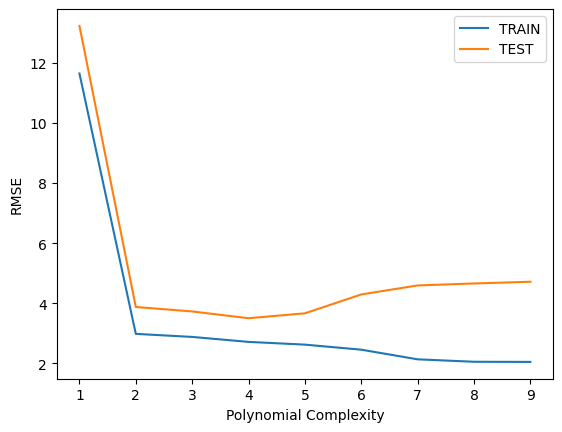

In [ ]:
plt.plot(range(1,10),train_rmse_errors[:10],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:10],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Aplicación del Modelo Óptimo

Se escoge por visualización el grado 4 para el modelamiento de las ventas de helado de acuerdo a la temperatura,

In [ ]:
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
poly_features = final_poly_converter.fit_transform(X)

Se divide la base de datos en entrenamiento y prueba,

In [ ]:
# Se divide la base de datos
X_train, X_test, y_train, y_test, X_train_original, X_test_original = train_test_split(
    poly_features, y, X, test_size=0.2, random_state=0)

Se entrena el modelo,

In [ ]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)

LinearRegression()

Se conocen los coeficientes del modelo,

In [ ]:
print('Coeficientes: ', final_model.coef_)
print('Intercepción: ', final_model.intercept_)

Coeficientes:  [-1.52849988  2.28870075  0.05455121 -0.02603947]
Intercepción:  2.473357318080719


In [ ]:
# Obtenemos las predicciones
y_pred = final_model.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

[[ 4.67503061]
 [30.48212113]
 [ 2.90924715]
 [ 6.79172783]
 [ 8.58580345]
 [16.06212272]
 [11.16054895]
 [20.20507585]
 [24.9698236 ]
 [20.31279325]]


In [ ]:
# KPI's del Modelo
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: {:0.2f}%'.format(MAE / np.mean(y_test) * 100))
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print('RMSE: {:0.2f}%'.format(RMSE / np.mean(y_test) * 100))
r2 = r2_score(y_test, y_pred)
print('R2: {:0.2f}'.format(r2))

MAE: 22.09%
RMSE: 26.29%
R2: 0.89


In [ ]:
# Se ordenan los datos para el gráfico
y_train_pred = final_model.predict(X_train)
sorted_indices = X_train_original[:, 0].argsort()
X_sorted = X_train_original[sorted_indices]
y_sorted = y_train_pred[sorted_indices]

Se realiza el gráfico,

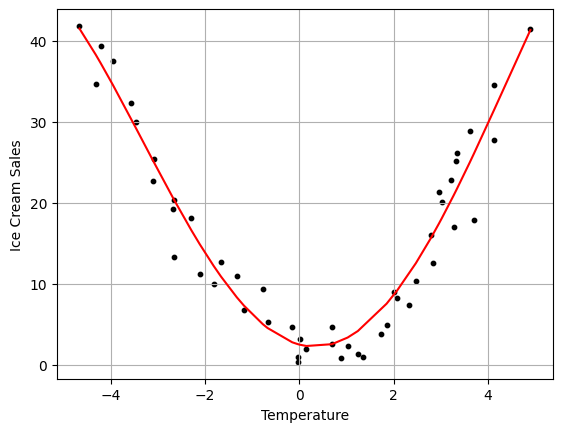

In [ ]:
# graficar conjunto de datos
plt.scatter(X, y, s=10, c='#000000')
plt.plot(X_sorted, y_sorted, color='r')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.grid()
plt.show()

## Referencias

*   Bhandari, M. D. (2023). polynomial regression. Kaggle.com. https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression
*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: with Applications in R. https://link.springer.com/content/pdf/10.1007/978-1-0716-1418-1.pdf

